# BLS Local Area Unemployment Data

More info can be found at: <https://download.bls.gov/pub/time.series/la/la.txt>

All related local unemployment area data can be found in this directory: <https://download.bls.gov/pub/time.series/la/>

In [5]:
import requests

def get_data(path_param):
    resp = requests.get(f'https://download.bls.gov/pub/time.series/la/{path_param}')
    if resp.status_code != 200:
        raise Exception(f'There was an issue retrieving data for {path_param}')
    return resp.text

def write_data(data, filename):
    with open(filename, 'w') as f:
        f.write(data)

In [7]:
ca_data_path_param = 'la.data.11.California'
ca_la_unemp_data_file = 'ca_local_area_unemployment.csv'

write_data(get_data(ca_data_path_param), ca_la_unemp_data_file)

In [14]:
import pandas as pd

unemp_data_ca = pd.read_csv(ca_la_unemp_data_file, sep='\s+')


In [15]:
unemp_data_ca.head()

,series_id,year,period,value,footnote_codes
0,LASBS060000000000003,1976,M01,9.4,R
1,LASBS060000000000003,1976,M02,9.4,R
2,LASBS060000000000003,1976,M03,9.3,R
3,LASBS060000000000003,1976,M04,9.2,R
4,LASBS060000000000003,1976,M05,9.1,R


In [16]:
# Unemployment Rate: Balance of California, state less Los Angeles-Long Beach-Glendale MD 

unemp_rate_ts_ca = unemp_data_ca[unemp_data_ca['series_id'] == 'LASBS060000000000003']

unemp_rate_ts_ca.describe()

,year,value
count,540.000000,540.00000
mean,1998.000000,7.23000
std,12.999215,2.16584
min,1976.000000,3.90000
25%,1987.000000,5.50000
50%,1998.000000,6.90000
75%,2009.000000,8.52500
max,2020.000000,15.10000


In [35]:
unemp_rate_ts_ca_with_month_ordering = unemp_rate_ts_ca.reset_index()

unemp_rate_ts_ca_with_month_ordering['date'] = unemp_rate_ts_ca_with_month_ordering['period'].str.slice(start=1) + '-' + unemp_rate_ts_ca_with_month_ordering['year'].map(str)

unemp_rate_ts_ca_with_month_ordering['date'] = pd.to_datetime(
   unemp_rate_ts_ca_with_month_ordering['date'], format='%m-%Y' 
).dt.strftime('%m-%Y')


,index,series_id,year,period,value,footnote_codes,year_month,date
0,0,LASBS060000000000003,1976,M01,9.4,R,197601,01-1976
1,1,LASBS060000000000003,1976,M02,9.4,R,197602,02-1976
2,2,LASBS060000000000003,1976,M03,9.3,R,197603,03-1976
3,3,LASBS060000000000003,1976,M04,9.2,R,197604,04-1976
4,4,LASBS060000000000003,1976,M05,9.1,R,197605,05-1976


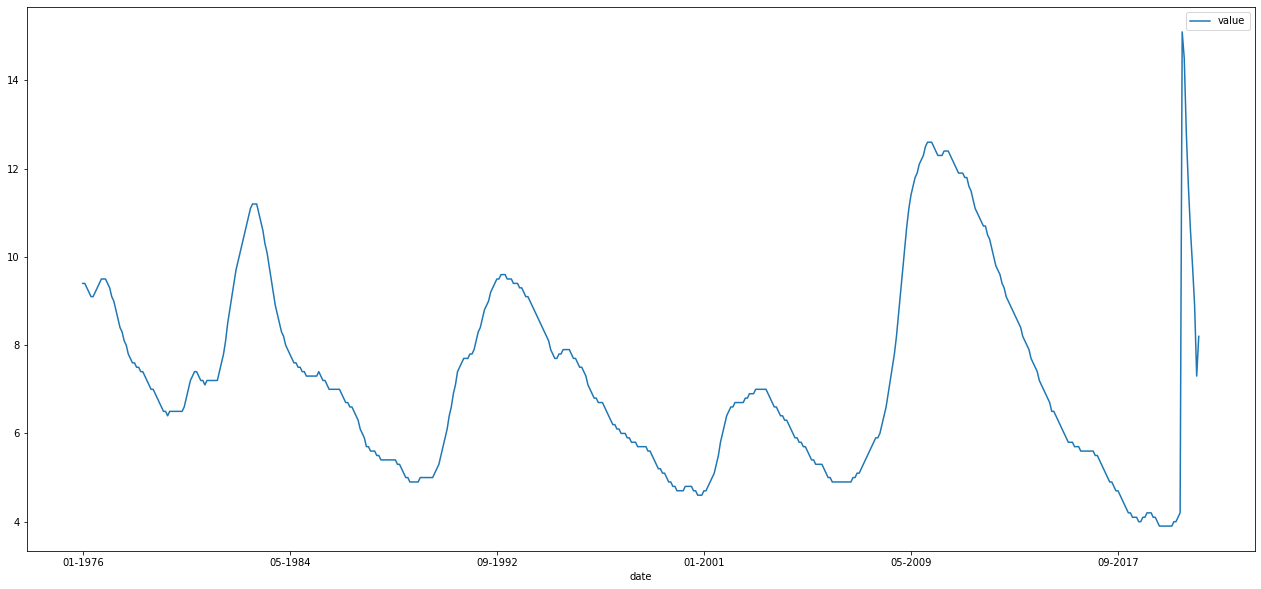

In [76]:
import matplotlib.pylab as plt
import matplotlib.dates as mdates


ax = unemp_rate_ts_ca_with_month_ordering.plot(
    x='date', y='value', figsize=(22,10)
)
# ax.xaxis.set_major_locator(mdates.MonthLocator())

# fig, ax = plt.subplots()
# plt.plot_date(unemp_rate_ts_ca_with_month_ordering['date'], unemp_rate_ts_ca_with_month_ordering['value'])
# # plt.set_ylabel('unemployment rate')
# plt.figure(figsize=(22,10))
# plt.show()